In [1]:
import os
import pydicom as dicom

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import numpy as np

#!~/anaconda3/bin/jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000.0 # (bytes/sec)
#!~/anaconda3/bin/jupyter notebook --NotebookApp.rate_limit_window=30.0 # (secs)

In [2]:
dose_dir = 'clinical_AA'
dose_file = os.listdir(dose_dir)

rd_file = os.path.join(dose_dir,dose_file[0])

fl = 'RTSTRUCT_2.16.840.1.113669.2.931128.818772296.20180226171802.209303.dcm'
rd_str = dicom.dcmread('/home/ef2p/Kaggle/cardiac/clinical_AA/'+fl, force=True)

rd_str.dir() # check tags
#print(rd_str.dir())
print(rd_str.SOPClassUID)
#print(rd_str.dir('contour'))

ctrs = rd_str.ROIContourSequence
#print(rd_str.PatientSex)
print(rd_str.StructureSetROISequence) #

#ctrs[1]

RT Structure Set Storage
[(3006, 0022) ROI Number                          IS: '1'
(3006, 0024) Referenced Frame of Reference UID   UI: 1.2.840.113704.1.111.5280.1410975204.4
(3006, 0026) ROI Name                            LO: '1a iso (Acqsim)'
(3006, 0036) ROI Generation Algorithm            CS: 'SEMIAUTOMATIC'(3006, 0022) ROI Number                          IS: '2'
(3006, 0024) Referenced Frame of Reference UID   UI: 1.2.840.113704.1.111.5280.1410975204.4
(3006, 0026) ROI Name                            LO: 'Other_Organs'
(3006, 002c) ROI Volume                          DS: "0"
(3006, 0036) ROI Generation Algorithm            CS: 'SEMIAUTOMATIC'(3006, 0022) ROI Number                          IS: '3'
(3006, 0024) Referenced Frame of Reference UID   UI: 1.2.840.113704.1.111.5280.1410975204.4
(3006, 0026) ROI Name                            LO: 'Lung Total- ITV'
(3006, 002c) ROI Volume                          DS: "0"
(3006, 0036) ROI Generation Algorithm            CS: 'SEMIAUTOMATIC

In [3]:
#The data is stored (in this case, as is usual) as a set of coordinates for each plane.
#To get the data for one contour, for one plane, you could use

xyz = []
x = []
y = []
z = []

# first index is a structure, second index is plane number (3 mm slices)
#multivalue = ctrs[1].ContourSequence[1].ContourData  # pick structure no. 1, z= -614

S = 4 # structure number, 4=aorta
print(rd_str.StructureSetROISequence[S-1].ROIName) # structure name

for j in range(0,len(ctrs[S].ContourSequence)):
    multivalue = ctrs[S].ContourSequence[j].ContourData
    for i, value in enumerate(multivalue):
       if i%3 == 0: x.append(value)
       if i%3 == 1: y.append(value)
       if i%3 == 2: z.append(value)
       #xyz.append(value)

print(len(ctrs),len(ctrs[S].ContourSequence))

aorta_CA
35 30


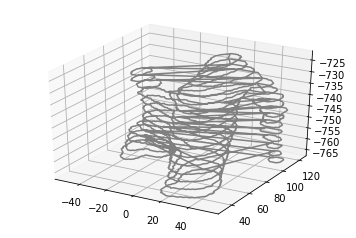

In [4]:
#print(xyz)
fig = plt.figure()
ax = plt.axes(projection='3d')

#ax.scatter3D(x,y,z, 'gray')
ax.plot3D(x,y,z, 'gray')

#plt.contour(xyz)
#plt.imshow(data1)
#plt.show()

In [5]:
# save x,y,x into 3D np-array and file
xyz = list(zip(x,y,z))
ao = np.array(xyz)
print(ao)

[[  46.2891  114.609  -767.    ]
 [  46.875   115.195  -767.    ]
 [  51.5625  115.195  -767.    ]
 ...
 [  12.3047   99.375  -722.    ]
 [  12.3047  100.547  -722.    ]
 [  16.4062  104.648  -722.    ]]
